# Energy Behavior of Prosumers 

Data is based on data from Kaggle competition: [Enefit - Predict Energy Behavior of Prosumers](https://www.kaggle.com/competitions/predict-energy-behavior-of-prosumers).

However to decrease the size of the dataset we limit the data to only **one district in Estonia**.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/tmp/ipykernel_187432/2080034654.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Data fields
#### target (predicted value)
- **target** - The energy production amount for the hour [MWh]

#### solar panels/prosumers characteristics
- **eic_count** - The aggregated number of consumption points (EICs - European Identifier Code).
- **installed_capacity** - Installed photovoltaic solar panel capacity in kilowatts.

#### datetime
- **datetime**

#### weather forecast
- temperature - The air temperature at 2 meters above ground in degrees Celsius. Estimated for the end of the 1-hour period.
- dewpoint - The dew point temperature at 2 meters above ground in degrees Celsius. Estimated for the end of the 1-hour period.
- cloudcover_[low/mid/high/total] - The percentage of the sky covered by clouds in the following altitude bands: 0-2 km, 2-6, 6+, and total. Estimated for the end of the 1-hour period.
- 10_metre_[u/v]_wind_component - The [eastward/northward] component of wind speed measured 10 meters above surface in meters per second. Estimated for the end of the 1-hour period.
- direct_solar_radiation - The direct solar radiation reaching the surface on a plane perpendicular to the direction of the Sun accumulated during the hour, in watt-hours per square meter.
- surface_solar_radiation_downwards - The solar radiation, both direct and diffuse, that reaches a horizontal plane at the surface of the Earth, accumulated during the hour, in watt-hours per square meter.
- snowfall - Snowfall over hour in units of meters of water equivalent.
- total_precipitation - The accumulated liquid, comprising rain and snow that falls on Earth's surface over the described hour, in units of meters.


#### historical weather
- temperature_hist_1h - Measured at the end of the 1-hour period.
- dewpoint_hist_1h - Measured at the end of the 1-hour period.
- rain_hist_1h - Different from the forecast conventions. The rain from large scale weather systems of the hour in millimeters.
- snowfall_hist_1h - Different from the forecast conventions. Snowfall over the hour in centimeters.
- surface_pressure_hist_1h - The air pressure at surface in hectopascals.
- cloudcover_[low/mid/high/total]_hist_1h - Different from the forecast conventions. Cloud cover at 0-3 km, 3-8, 8+, and total.
- windspeed_10m_hist_1h - Different from the forecast conventions. The wind speed at 10 meters above ground in meters per second.
- winddirection_10m_hist_1h - Different from the forecast conventions. The wind direction at 10 meters above ground in degrees.
- shortwave_radiation_hist_1h - Different from the forecast conventions. The global horizontal irradiation in watt-hours per square meter.
- direct_solar_radiation_hist_1h
- diffuse_radiation_hist_1h - Different from the forecast conventions. The diffuse solar irradiation in watt-hours per square meter.


In [3]:
DATA_FILE_PATH = 'solar_energy_prediction_data.csv'

In [4]:
df = pd.read_csv(DATA_FILE_PATH)

In [5]:
df.head().T

,0,1,2,3,4
datetime,2021-09-01 00:00:00,2021-09-01 01:00:00,2021-09-01 02:00:00,2021-09-01 03:00:00,2021-09-01 04:00:00
target,0.0,0.0,0.0,0.0,0.0
eic_count,NaN,NaN,NaN,NaN,NaN
installed_capacity,NaN,NaN,NaN,NaN,NaN
temperature,NaN,NaN,NaN,NaN,NaN
dewpoint,NaN,NaN,NaN,NaN,NaN
cloudcover_high,NaN,NaN,NaN,NaN,NaN
cloudcover_low,NaN,NaN,NaN,NaN,NaN
cloudcover_mid,NaN,NaN,NaN,NaN,NaN
cloudcover_total,NaN,NaN,NaN,NaN,NaN


In [6]:
df.dtypes

datetime                              object
target                               float64
eic_count                            float64
installed_capacity                   float64
temperature                          float64
dewpoint                             float64
cloudcover_high                      float64
cloudcover_low                       float64
cloudcover_mid                       float64
cloudcover_total                     float64
10_metre_u_wind_component            float64
10_metre_v_wind_component            float64
direct_solar_radiation               float64
surface_solar_radiation_downwards    float64
snowfall                             float64
total_precipitation                  float64
temperature_hist_1h                  float64
dewpoint_hist_1h                     float64
rain_hist_1h                         float64
snowfall_hist_1h                     float64
surface_pressure_hist_1h             float64
cloudcover_total_hist_1h             float64
cloudcover

### Date and time transformations

In [7]:
# Transform to pandas datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

In [8]:
# Get year month day day of the year and hour
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['weekday'] = df['datetime'].dt.weekday
df['dayofyear'] = df['datetime'].dt.dayofyear
df['hour'] = df['datetime'].dt.hour

### Energy production in each month of the year
- As we expected - the highest production is during the summer months and very low, almost 0 in the winter.

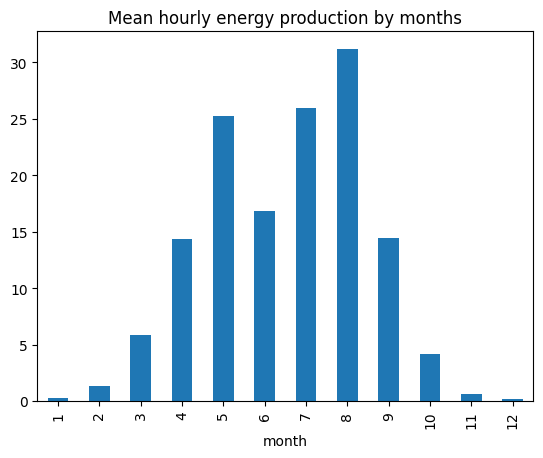

In [9]:
df.groupby('month').target.mean().plot.bar(title='Mean hourly energy production by months');

### Cyclical features encoding 
- https://joaquinamatrodrigo.github.io/skforecast/0.8.1/faq/cyclical-features-time-series.html
- https://towardsdatascience.com/cyclical-features-encoding-its-about-time-ce23581845ca

In [10]:
df['sin_dayofyear'] = np.sin(2 * np.pi * df['dayofyear'] / 366)
df['cos_dayofyear'] = np.cos(2 * np.pi * df['dayofyear'] / 366)

In [11]:
df['sin_hour'] = round(np.sin(2 * np.pi * df['hour'] / 24), 2)
df['cos_hour'] = round(np.cos(2 * np.pi * df['hour'] / 24), 2)

#### Plotting cyclical features
- yellow and green dots denote higher energy production during the day (first plot) and the summer (the plot second plot below).

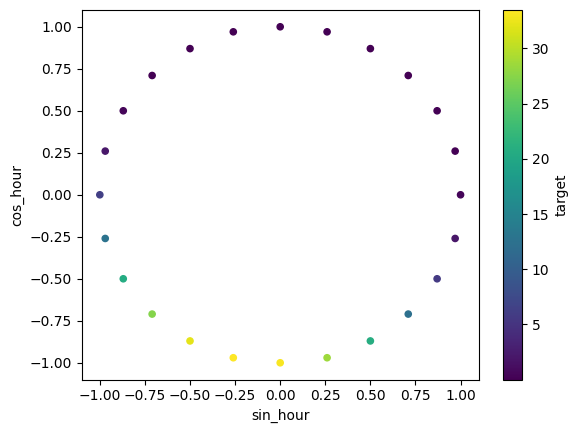

In [12]:
df.groupby(['sin_hour','cos_hour']).target.mean().reset_index().plot.scatter(x='sin_hour', y='cos_hour', c='target', colormap='viridis');

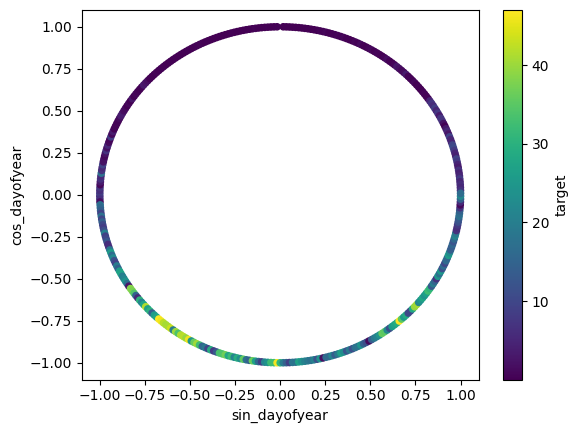

In [13]:
df.groupby(['sin_dayofyear', 'cos_dayofyear']).target.mean().reset_index().plot.scatter(x='sin_dayofyear', y='cos_dayofyear', c='target', colormap='viridis');

### Installed capacity in time

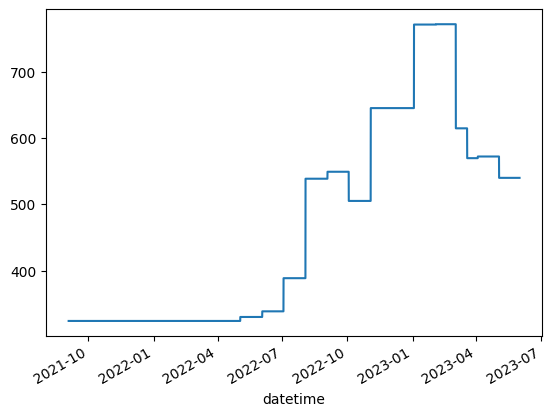

In [16]:
df.set_index('datetime')['installed_capacity'].plot();

### Create from one to seven days lags of target values
- Energy production the previous day(s) at the same time could be a good predictor of current production.

In [20]:
df['target_1d_lag'] = df['target'].shift(24*1)
df['target_2d_lag'] = df['target'].shift(24*2)
df['target_3d_lag'] = df['target'].shift(24*3)
df['target_4d_lag'] = df['target'].shift(24*4)
df['target_5d_lag'] = df['target'].shift(24*5)
df['target_6d_lag'] = df['target'].shift(24*6)
df['target_7d_lag'] = df['target'].shift(24*7)

### Missing values

In [21]:
df.isnull().sum()

datetime                               0
target                                 0
eic_count                             48
installed_capacity                    48
temperature                           25
dewpoint                              25
cloudcover_high                       25
cloudcover_low                        25
cloudcover_mid                        25
cloudcover_total                      25
10_metre_u_wind_component             25
10_metre_v_wind_component             25
direct_solar_radiation                25
surface_solar_radiation_downwards     25
snowfall                              25
total_precipitation                   25
temperature_hist_1h                   37
dewpoint_hist_1h                      37
rain_hist_1h                          37
snowfall_hist_1h                      37
surface_pressure_hist_1h              37
cloudcover_total_hist_1h              37
cloudcover_low_hist_1h                37
cloudcover_mid_hist_1h                37
cloudcover_high_

In [22]:
df.isna().sum()

datetime                               0
target                                 0
eic_count                             48
installed_capacity                    48
temperature                           25
dewpoint                              25
cloudcover_high                       25
cloudcover_low                        25
cloudcover_mid                        25
cloudcover_total                      25
10_metre_u_wind_component             25
10_metre_v_wind_component             25
direct_solar_radiation                25
surface_solar_radiation_downwards     25
snowfall                              25
total_precipitation                   25
temperature_hist_1h                   37
dewpoint_hist_1h                      37
rain_hist_1h                          37
snowfall_hist_1h                      37
surface_pressure_hist_1h              37
cloudcover_total_hist_1h              37
cloudcover_low_hist_1h                37
cloudcover_mid_hist_1h                37
cloudcover_high_

In [23]:
df.shape

(15308, 47)

#### Handling missing values: exclude

In [28]:
data = df.loc[~df.isna().any(axis=1)].reset_index(drop=True)

In [34]:
data.head()

,datetime,target,eic_count,installed_capacity,temperature,dewpoint,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,...,sin_hour,cos_hour,target_1d_lag,target_2d_lag,target_3d_lag,target_4d_lag,target_5d_lag,target_6d_lag,target_7d_lag,production_per_cap_unit
0,2021-09-08 00:00:00,0.0,6.0,324.2,14.586145,12.467920,0.000000,0.057953,0.150330,0.185695,...,0.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-09-08 01:00:00,0.0,6.0,324.2,14.404932,12.962000,0.007896,0.062828,0.022690,0.084471,...,0.26,0.97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-09-08 02:00:00,0.0,6.0,324.2,14.233301,13.118494,0.392868,0.067619,0.003510,0.425801,...,0.50,0.87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-09-08 03:00:00,0.0,6.0,324.2,14.188745,13.118677,0.357033,0.124176,0.000031,0.415109,...,0.71,0.71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-09-08 04:00:00,0.0,6.0,324.2,14.884485,13.389856,0.370682,0.186813,0.308960,0.584599,...,0.87,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Plots of target values

In [31]:
data.loc[:,'production_per_cap_unit'] = data['target'] / data['installed_capacity']

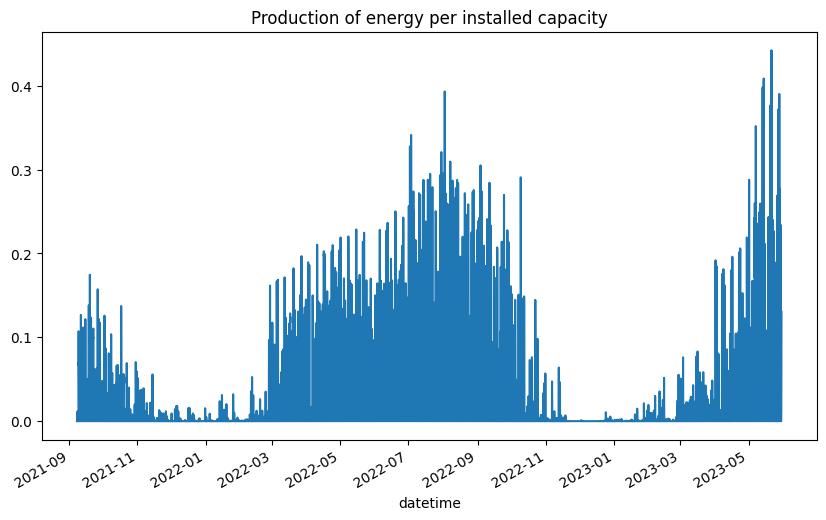

In [32]:
data.set_index('datetime').production_per_cap_unit.plot(
    figsize=(10,6),
    title="Production of energy per installed capacity"
);

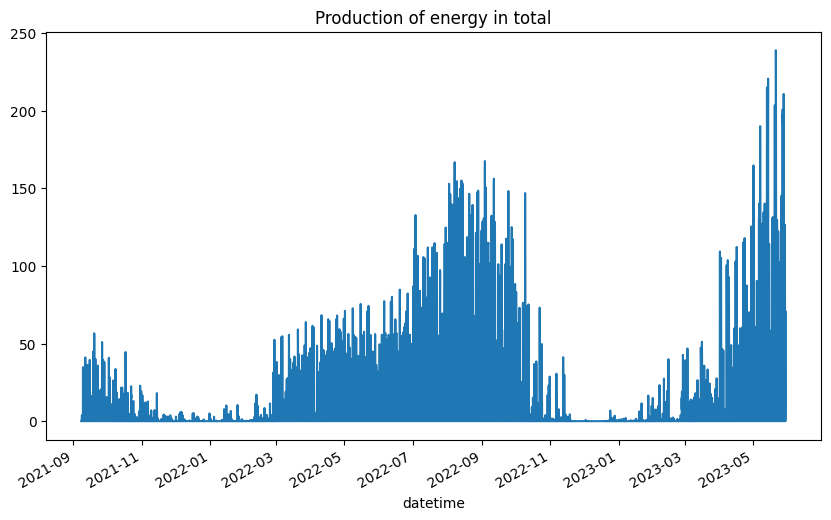

In [33]:
data.set_index('datetime').target.plot(
    figsize=(10,6),
    title="Production of energy in total"
);

#### Summary:
- Our data is ready to be modelled.

In [35]:
data.to_csv('solar_energy_data_clean.csv', index=False)